In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

# CARGAMOS LOS DATOS

In [91]:
df = pd.read_csv("../data/raw/housing.csv")
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Quitamos los datos no necesarios

In [92]:
df_clean = df[["MedInc", "Latitude", "Longitude"]]
df_clean

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [93]:
df_clean.drop_duplicates().sum

<bound method DataFrame.sum of        MedInc  Latitude  Longitude
0      8.3252     37.88    -122.23
1      8.3014     37.86    -122.22
2      7.2574     37.85    -122.24
3      5.6431     37.85    -122.25
4      3.8462     37.85    -122.25
...       ...       ...        ...
20635  1.5603     39.48    -121.09
20636  2.5568     39.49    -121.21
20637  1.7000     39.43    -121.22
20638  1.8672     39.43    -121.32
20639  2.3886     39.37    -121.24

[20635 rows x 3 columns]>

## Hacemos el K-Means

In [94]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_clean)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


## Añadimos "cluster" a las columnas

In [95]:
df_clean["cluster"] = kmeans.labels_
df_clean

/tmp/ipykernel_19621/3596234930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["cluster"] = kmeans.labels_


,MedInc,Latitude,Longitude,cluster
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,1
...,...,...,...,...
20635,1.5603,39.48,-121.09,1
20636,2.5568,39.49,-121.21,1
20637,1.7000,39.43,-121.22,1
20638,1.8672,39.43,-121.32,1


# Preparar datos para el modelo supervisado

In [96]:
X = df_clean[["MedInc", "Latitude", "Longitude"]].copy()
y = df_clean["cluster"].copy()

split

In [97]:
X_train, X_test, y_train, y_test = train_test_split( 
                                                     X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42,)

resultados

In [98]:
X_train_plot = X_train.copy()
X_train_plot["cluster"] = y_train

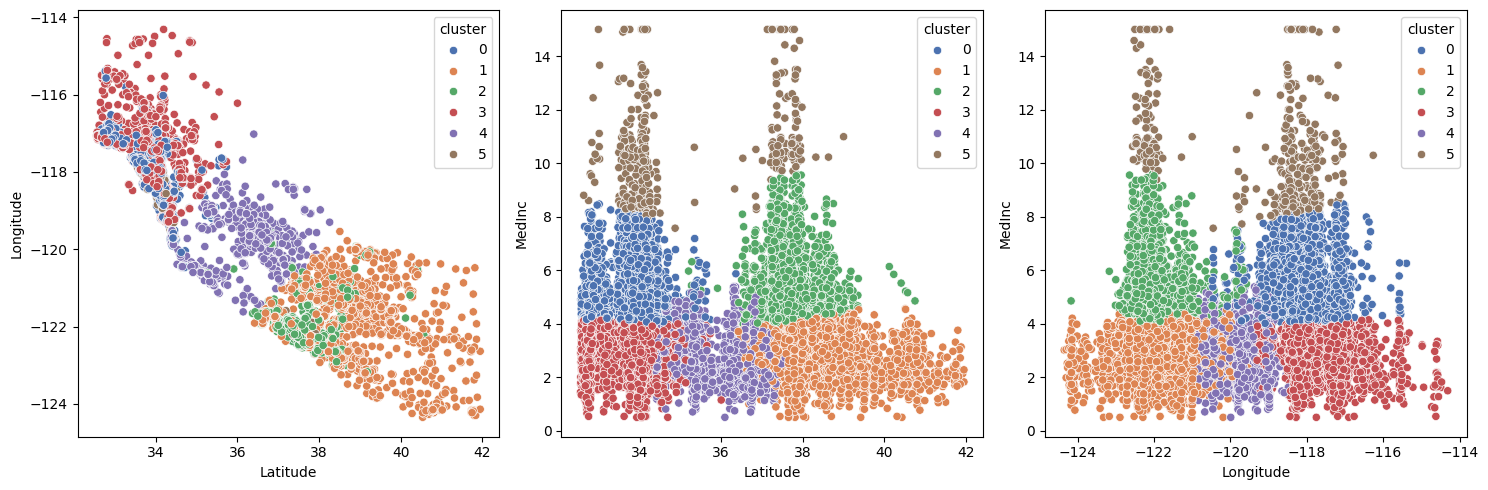

In [99]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train_plot, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train_plot, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train_plot, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")

plt.tight_layout()
plt.show()

In [100]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,4
3024,2.5313,35.14,-119.46,4
15663,3.4801,37.80,-122.44,1
20484,5.7376,34.28,-118.72,0
9814,3.7250,36.62,-121.93,1


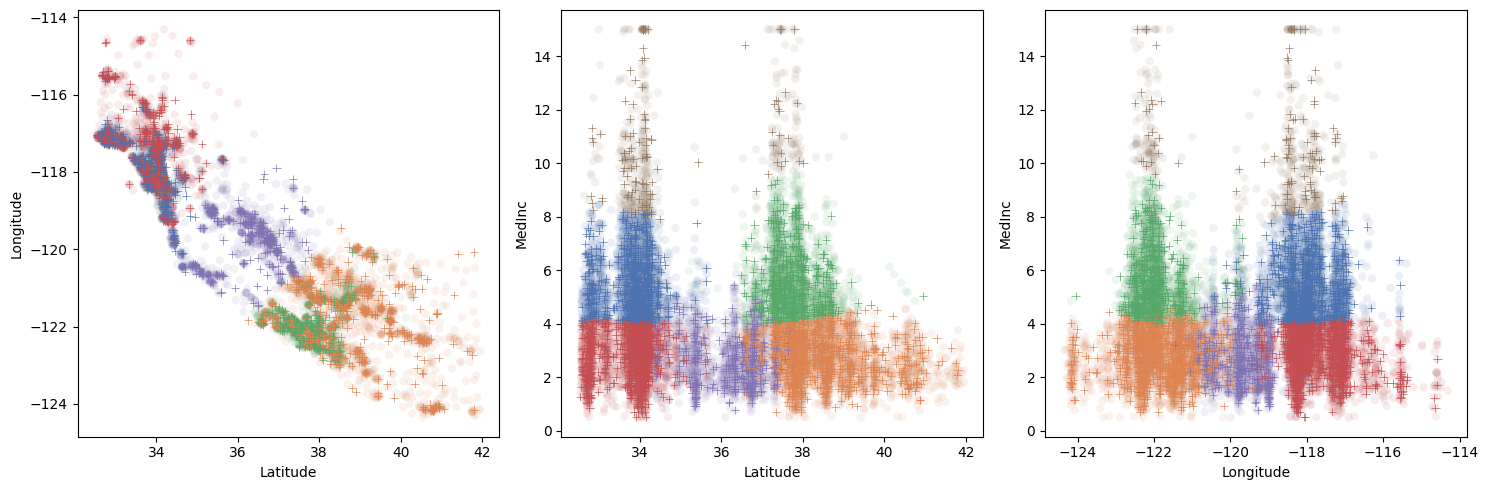

In [101]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train_plot, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha = 0.1)
sns.scatterplot(ax = axis[1], data = X_train_plot, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha = 0.1)
sns.scatterplot(ax = axis[2], data = X_train_plot, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha = 0.1)
sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc",hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

## entrenamos el arbol de decisión

In [102]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [103]:
X_train_plot = X_train.copy()
X_train_plot["cluster"] = y_train

X_test_plot = X_test.copy()
X_test_plot["cluster"] = y_test

In [104]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

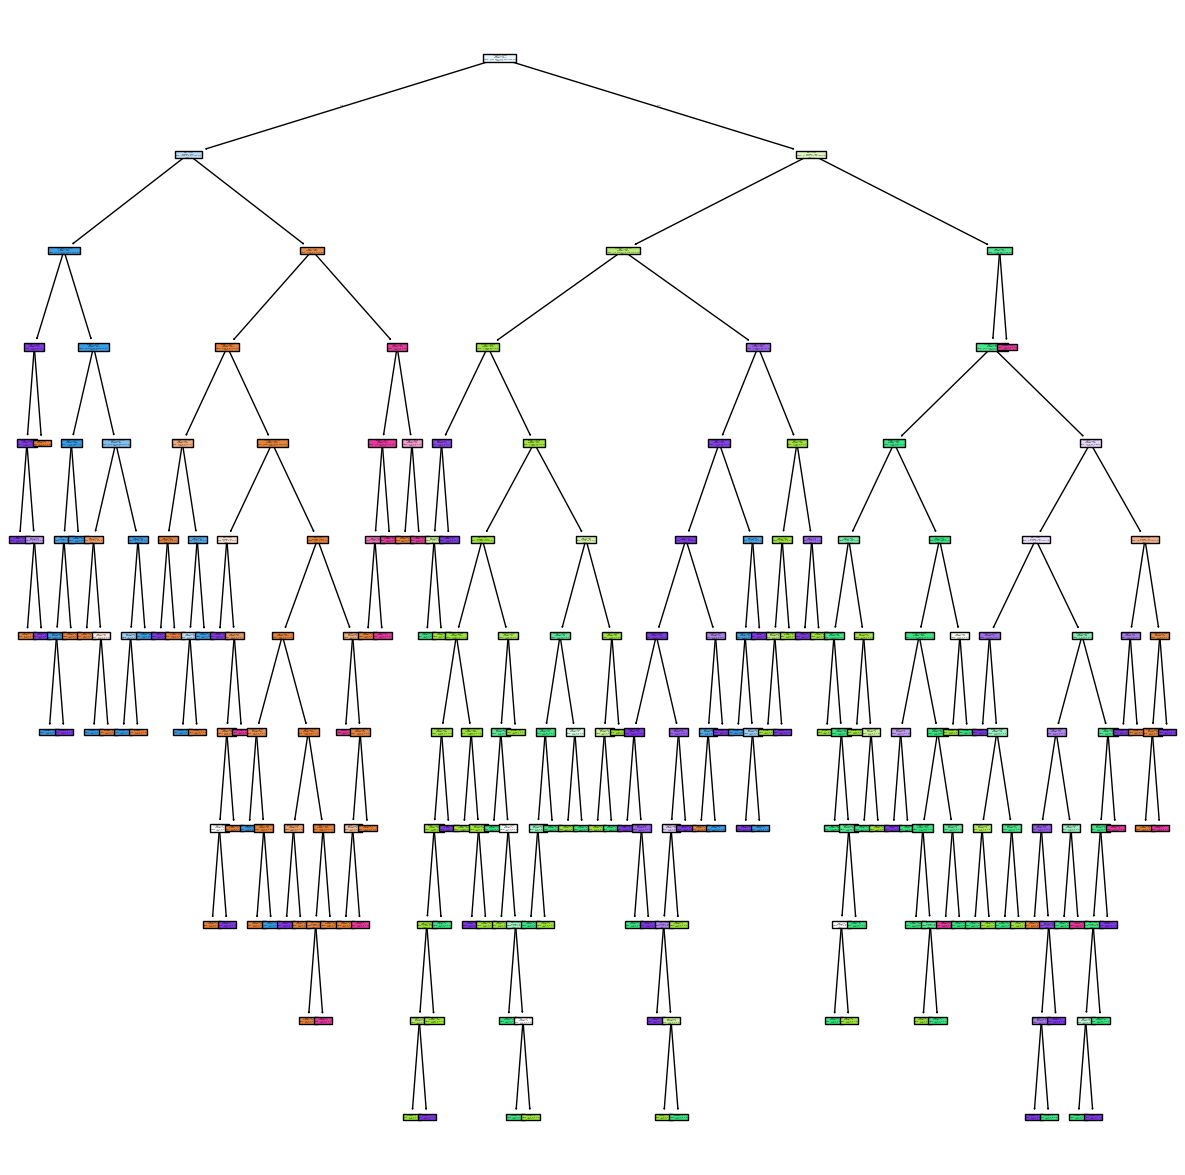

In [105]:
fig = plt.figure(figsize=(15, 15))
tree.plot_tree(
    model,
    feature_names=list(X_train.columns),
    class_names=[str(i) for i in sorted(y.unique())],
    filled=True
)

plt.show()

In [106]:
accuracy_score(y_test, y_pred)

1.0

# Guardado

In [107]:
dump(kmeans, open("kmeans_clusters_6_42.sav", "wb"))
dump(model, open("decision_tree_kmeans_6_42.sav", "wb"))